# Time Value of Money
#### Muhammad Kevin Alrahmanto (19/445592/PA/19416, Universitas Gadjah Mada)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Discounting and compounding cash flows

- Money has a time unit.
- Need exchange rate ($R$) for time a.k.a., rate of return, hurdle rate, opprtunity cost of capital
- "Never" add/subtract cash flows received at different times.

## 1.1  Discounting with constant cash flows (Simulation 1)

- Discounting cash flows moves them back in time

Present value (PV) of cash flows (CFs) is discounted value of CFs as of time (t):
$$
PV=\sum_{t=1}^{\;n}\frac{CF}{{(1+R)}^t}
$$

Example: How much do you have to save today to withdraw $100 at the end of each of the next 9 years if you can earn 5% PER ANNUM?

In [176]:
cf=100
periods=9
rate=5

In [177]:
CFs=pd.DataFrame({'cash':[np.round(np.sum([cf*(1+rate/100)**-period for period in range(1, periods+1)]),2)] + [cf]*periods},
                 index=['CF_'+str(period) if period >0 else 'PV(CF_0)' for period in range(periods+1)])
CFs.T

,PV(CF_0),CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,CF_8,CF_9
cash,710.78,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [178]:
interpretation=f'We need ${CFs.iloc[0][0]} today in an account earning {rate}% each year \nso that we can withdraw ${cf} at the end of each the next {periods} years'
print(interpretation)

We need $710.78 today in an account earning 5% each year 
so that we can withdraw $100 at the end of each the next 9 years


In [179]:
post_wb=np.round(np.cumsum([cf*(1+rate/100)**-period for period in range(1, periods+1)]),2)#Post-Withdrawal Balance
interest=np.round(post_wb*rate/100,2)
saving_simulation=pd.DataFrame({'Year': np.arange(periods+1),
                                'Interest': np.hstack((0,interest[::-1])),
                                'Pre-Withdrawal Balance': np.hstack((post_wb+interest,0))[::-1],  
                                'Withdrawal': np.hstack((0,[cf]*periods)), 
                                'Post-Withdrawal Balance': np.hstack((post_wb[::-1], 0))}).set_index('Year')
saving_simulation

,Interest,Pre-Withdrawal Balance,Withdrawal,Post-Withdrawal Balance
Year,,,,
0,0.00,0.00,0,710.78
1,35.54,746.32,100,646.32
2,32.32,678.64,100,578.64
3,28.93,607.57,100,507.57
4,25.38,532.95,100,432.95
5,21.65,454.60,100,354.60
6,17.73,372.33,100,272.32
7,13.62,285.94,100,185.94
8,9.30,195.24,100,95.24


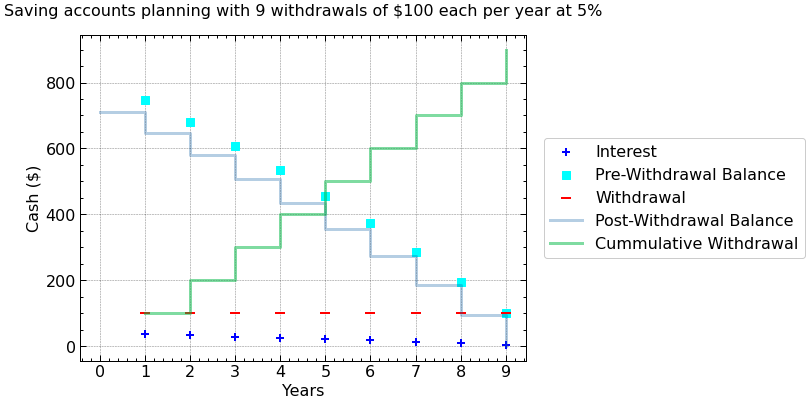

In [180]:
plt.scatter(saving_simulation.index[1:], saving_simulation["Interest"][1:], label ="Interest", color='blue', s=50, marker='+')
plt.scatter(saving_simulation.index[1:], saving_simulation["Pre-Withdrawal Balance"][1:], label ="Pre-Withdrawal Balance", color='cyan', s=50, marker='s')
plt.scatter(saving_simulation.index[1:], saving_simulation["Withdrawal"][1:], label ="Withdrawal", color='red', s=100, marker='_')
plt.step(saving_simulation.index, saving_simulation["Post-Withdrawal Balance"], where='post', lw=3, label ="Post-Withdrawal Balance", alpha=0.3)
plt.step(saving_simulation.index[1:], np.cumsum(saving_simulation["Withdrawal"])[1:], where='post', lw=3, label ="Cummulative Withdrawal", alpha=0.5)

plt.xlabel('Years')
plt.ylabel('Cash ($)')
plt.title(f'Saving accounts planning with {periods} withdrawals of ${cf} each per year at {rate}%', pad=20)
plt.xticks(saving_simulation.index)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

## 1.2  Compounding with constant cash flows (Simulation 2)

- Compounding cash flows moves them forward in time

Future value (FV) of cash flows (CFs) is compounded value of CFs as of time (t):
$$
FV=\sum_{t=0}^{\;n}CF{(1+R)}^t
$$

Example: How much will we have 8 years from today if we save $300 a year, beggining today, for the next 7 years, assuming we earn 6.3% interest PER ANNUM?

In [181]:
cf=300
periods=8
rate=6.3

In [182]:
FVs=pd.DataFrame({'cash':[cf]*periods +[np.round(np.sum([cf*(1+rate/100)**period for period in range(1, periods+1)]),2)]},
                 index=['CF_'+str(period) if period <periods  else 'FV' for period in range(0, periods+1)])
FVs.T

,CF_0,CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,FV
cash,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,3190.49


In [183]:
interpretation=f'We will have ${FVs.iloc[-1][-1]} at the end of {periods} years if we save ${cf} starting \ntoday for the next {periods-1} years and our money earns {rate}% per annum.'
print(interpretation)

We will have $3190.49 at the end of 8 years if we save $300 starting 
today for the next 7 years and our money earns 6.3% per annum.


In [184]:
pre_db=np.round(np.cumsum([cf*(1+rate/100)**period for period in range(1, periods+1)]),2) # Pre-deposit balance
dep=np.array([cf]*periods+[0]) #Deposit flows
saving_simulation_2=pd.DataFrame({'Year': np.arange(periods+1),
                                'Interest': np.round(np.hstack((0,(dep+np.hstack((0, pre_db)))[:-1]*rate/100)),2),
                                'Pre-Deposit Balance': np.hstack((0, pre_db)),  
                                'Deposit': dep, 
                                'Post-Deposit Balance': dep+np.hstack((0, pre_db))}).set_index('Year')
saving_simulation_2

,Interest,Pre-Deposit Balance,Deposit,Post-Deposit Balance
Year,,,,
0,0.00,0.00,300,300.00
1,18.90,318.90,300,618.90
2,38.99,657.89,300,957.89
3,60.35,1018.24,300,1318.24
4,83.05,1401.29,300,1701.29
5,107.18,1808.47,300,2108.47
6,132.83,2241.30,300,2541.30
7,160.10,2701.40,300,3001.40
8,189.09,3190.49,0,3190.49


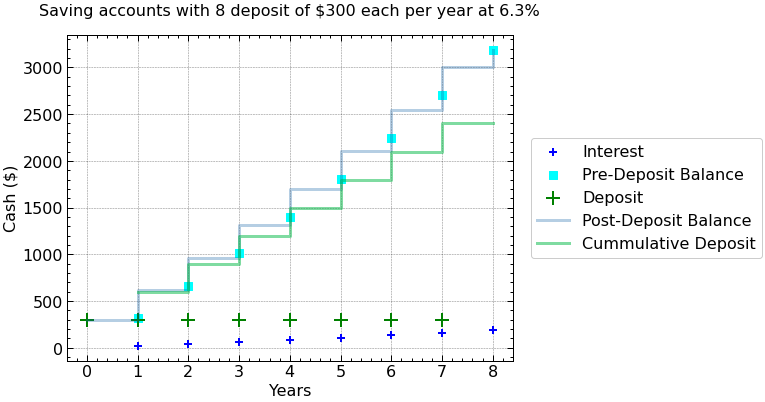

In [190]:
plt.scatter(saving_simulation_2.index[1:], saving_simulation_2["Interest"][1:], label ="Interest", color='blue', s=50, marker='+')
plt.scatter(saving_simulation_2.index[1:], saving_simulation_2["Pre-Deposit Balance"][1:], label ="Pre-Deposit Balance", color='cyan', s=50, marker='s')
plt.scatter(saving_simulation_2.index[:-1], saving_simulation_2["Deposit"][:-1], label ="Deposit", color='green', s=200, marker='+')
plt.step(saving_simulation_2.index, saving_simulation_2["Post-Deposit Balance"], where='post', lw=3, label ="Post-Deposit Balance", alpha=0.3)
plt.step(saving_simulation_2.index[1:], np.cumsum(saving_simulation_2["Deposit"])[1:], where='post', lw=3, label ="Cummulative Deposit", alpha=0.5)

plt.xlabel('Years')
plt.ylabel('Cash ($)')
plt.title(f'Saving accounts with {periods} deposit of ${cf} each per year at {rate}%', pad=20)
plt.xticks(saving_simulation_2.index)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

## 1.3  Discounting with constant cash flows + TAXES (Simulation 3)

Example: How much do you have to save today to withdraw $100 at the end of each of the next 9 years if you can earn 5% PER ANNUM with interest taxes at 35% per annum?

In [388]:
cf=100
periods=9
rate_before_tax=5
tax=35

After-tax discount rate (Rt):
$$
Rt=R(1-tr)
$$
where $R$ is the nominal return and $tr$ is the tax rate

In [389]:
rate=rate_before_tax/100*(1-tax/100)*100
print(f'The after-tax discount rate is {rate}%')

The after-tax discount rate is 3.25%


In [390]:
CFs_tax=pd.DataFrame({'cash':[np.round(np.sum([cf*(1+rate/100)**-period for period in range(1, periods+1)]),2)] + [cf]*periods},
                 index=['CF_'+str(period) if period >0 else 'PV(CF_0)' for period in range(periods+1)])
CFs_tax.T

,PV(CF_0),CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,CF_8,CF_9
cash,769.61,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [391]:
post_wb=np.round(np.cumsum([cf*(1+rate/100)**-period for period in range(1, periods+1)]),2)#Post-Withdrawal Balance
interest=np.round(post_wb*rate_before_tax/100,2)
taxes=-np.round(interest*tax/100,2)
saving_simulation_3=pd.DataFrame({'Year': np.arange(periods+1),
                                  'Interest': np.hstack((0,interest[::-1])),
                                  'Taxes':np.hstack((0,taxes[::-1])),
                                  'Pre-Withdrawal Balance': np.hstack((post_wb+interest+taxes,0))[::-1],  
                                  'Withdrawal': np.hstack((0,[cf]*periods)), 
                                  'Post-Withdrawal Balance': np.hstack((post_wb[::-1], 0))}).set_index('Year')
saving_simulation_3

,Interest,Taxes,Pre-Withdrawal Balance,Withdrawal,Post-Withdrawal Balance
Year,,,,,
0,0.00,0.00,0.00,0,769.61
1,38.48,-13.47,794.62,100,694.62
2,34.73,-12.16,717.19,100,617.20
3,30.86,-10.80,637.26,100,537.26
4,26.86,-9.40,554.72,100,454.72
5,22.74,-7.96,469.50,100,369.50
6,18.48,-6.47,381.51,100,281.51
7,14.08,-4.93,290.66,100,190.66
8,9.53,-3.34,196.85,100,96.85


## 1.4  Discounting with varying cash flows: the implication of INFLATION (Simulation 4)

Example: How much do you have to save today to withdraw $100 at the end of each of the next 9 years if you can earn 5% PER ANNUM with expected inflation at 2.5% per annum?

In [378]:
cf=100
periods=9
rate=5 #nominal rate
inf=2.5 #inflation rate

Real discount rate (RR):
$$
RR=\frac{(1+R)}{(1+\pi)}-1\approx R-\pi
$$
where $R$ is the nominal return and $\pi$ is the expected inflation

In [379]:
rr=(rate/100 - inf/100)*100 #Commmonly used approximation
print(f'The after-tax discount rate is {rr}%')

The after-tax discount rate is 2.5%


- Inflation won't affect the money we earn
- Inflation will affect what we can buy with the money
- Implication: We need to change withdrawal amount (Increase to buy costlier goods)

In [380]:
withdrawal_inf=np.round([cf*(1+inf/100)**period for period in range(1, periods+1)], 2)
withdrawal_inf #withdrawals grow each year to accomodate inflation

array([102.5 , 105.06, 107.69, 110.38, 113.14, 115.97, 118.87, 121.84,
       124.89])

In [381]:
pv_inf=np.round(np.sum([cf*(1+rate/100)**-(period+1) for period,cf in enumerate(withdrawal_inf)]),2)
pv_inf

799.38

In [382]:
CFs_inf=pd.DataFrame({'cash': np.hstack((pv_inf, withdrawal_inf))},
                 index=['CF_'+str(period) if period >0 else 'PV(CF_0)' for period in range(periods+1)])
CFs_inf.T

,PV(CF_0),CF_1,CF_2,CF_3,CF_4,CF_5,CF_6,CF_7,CF_8,CF_9
cash,799.38,102.5,105.06,107.69,110.38,113.14,115.97,118.87,121.84,124.89


In [383]:
post_wb_inf=[pv_inf]
for i in range(periods):
    post_wb_inf.append(np.round(post_wb_inf[i]*(1+rate/100)-withdrawal_inf[i], 2))
post_wb_inf

[799.38, 736.85, 668.63, 594.37, 513.71, 426.26, 331.6, 229.31, 118.94, -0.0]

In [384]:
interest_inf=np.round(np.array(post_wb_inf)*(rate/100),2)
interest_inf[:-1]

array([39.97, 36.84, 33.43, 29.72, 25.69, 21.31, 16.58, 11.47,  5.95])

In [385]:
pre_wb_inf=post_wb_inf+interest_inf
pre_wb_inf[:-1]

array([839.35, 773.69, 702.06, 624.09, 539.4 , 447.57, 348.18, 240.78,
       124.89])

In [386]:
saving_simulation_3=pd.DataFrame({'Year': np.arange(periods+1),
                                  'Interest': np.hstack((0,interest_inf[:-1])),
                                  'Pre-Withdrawal Balance': np.hstack((0,pre_wb_inf[:-1] )),  
                                  'Withdrawal': np.hstack((0,withdrawal_inf)), 
                                  'Post-Withdrawal Balance':post_wb_inf}).set_index('Year')
saving_simulation_3

,Interest,Pre-Withdrawal Balance,Withdrawal,Post-Withdrawal Balance
Year,,,,
0,0.00,0.00,0.00,799.38
1,39.97,839.35,102.50,736.85
2,36.84,773.69,105.06,668.63
3,33.43,702.06,107.69,594.37
4,29.72,624.09,110.38,513.71
5,25.69,539.40,113.14,426.26
6,21.31,447.57,115.97,331.60
7,16.58,348.18,118.87,229.31
8,11.47,240.78,121.84,118.94
